In [3]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
#Exibição na mesma tela do Jupyter
%matplotlib inline

plt.style.use('seaborn')
sns.set_style("whitegrid", {'axes.grid' : False})

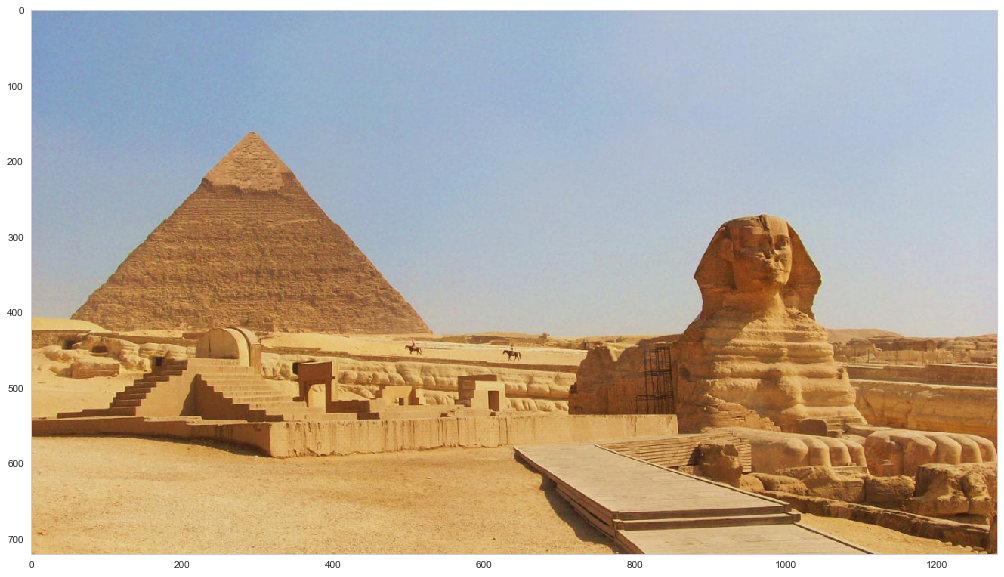

In [4]:
imagem = mpimg.imread("gize.png")
plt.figure(figsize=(20,10))
plt.imshow(imagem)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


720 1280


Text(0.5,1,'Portal com Marcadores')

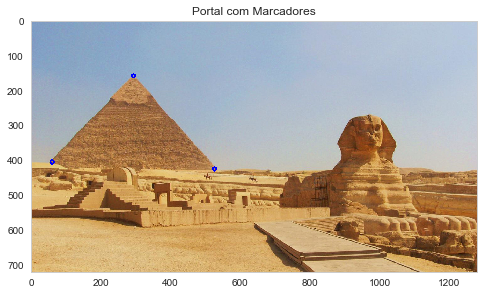

In [27]:
height, width = imagem.shape[:2]

imagem_marcadores = imagem.copy()

print(height, width)

pontos_marcadores = np.float32([[60,405],[293,159],[525,425]])
pontos_destino = np.float32([[0,0],[800,0],[0,600],[800,600]])

# Adicionando marcadores para visualizar os pontos que serão expandidos
color = (0, 0, 255)

cv2.circle(imagem_marcadores, (60,405), 5, color, 3)
cv2.circle(imagem_marcadores, (293,159), 5, color, 3)
cv2.circle(imagem_marcadores, (525,425), 5, color, 3)

plt.imshow(imagem_marcadores)
plt.title("Portal com Marcadores")

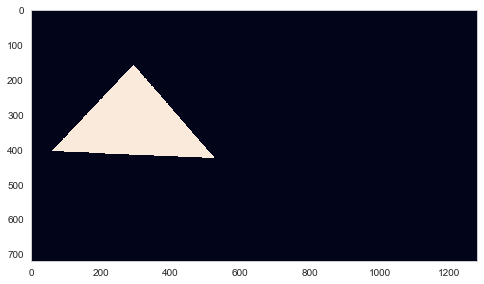

In [34]:
altura = imagem.shape[0]
largura = imagem.shape[1]

imagem_toda = np.zeros((altura,largura), np.uint8)
pontos_triang = np.array([[60,405],[293,159],[525,425]], np.int32)

cv2.fillPoly(imagem_toda, [pontos_triang],(100,50,200))

plt.imshow(imagem_toda)

Text(0.5,1,'Operação And (E)')

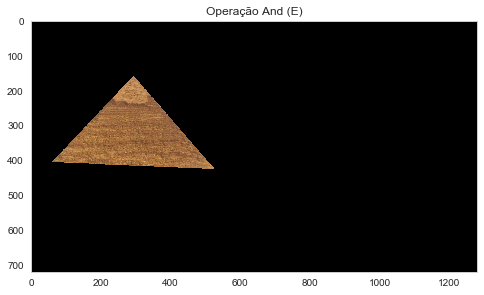

In [37]:
imagem_recort = cv2.bitwise_and(imagem,imagem,mask=imagem_toda)

plt.imshow(imagem_recort)
plt.title("Operação And (E)")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'Imagem com fundo verde')

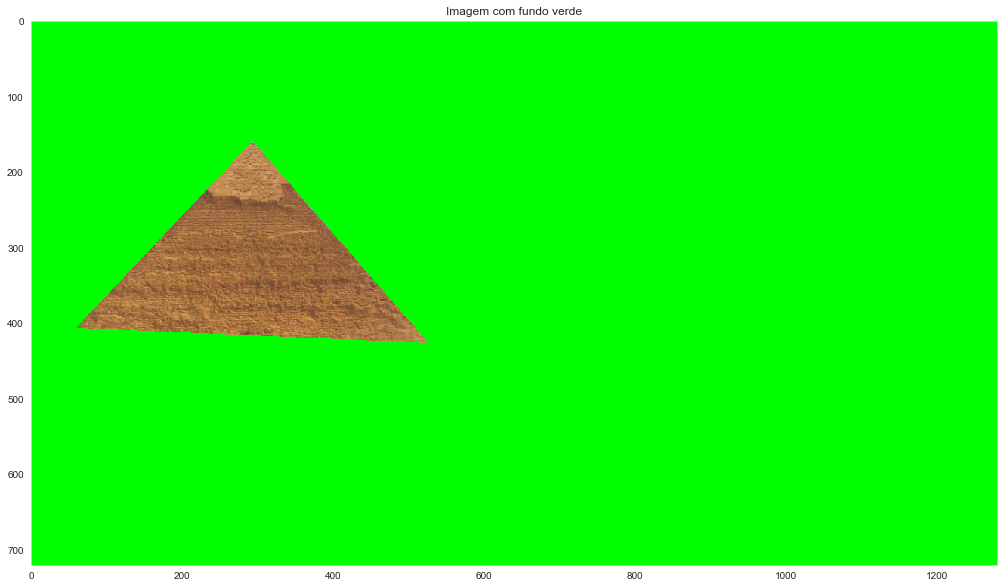

In [39]:
imagem_recort[np.where((imagem_recort == [0,0,0]).all(axis = 2))] = [0,255,0]

plt.figure(figsize=(20,10))
plt.imshow(imagem_recort)
plt.title("Imagem com fundo verde")